In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from data_prep import DataPrep

In [2]:
data_prep = DataPrep()

In [3]:
df = data_prep.load_raw_data(laptop=True)
df = data_prep.prep_raw_data(df=df)
df = data_prep.calc_rsi(df=df)

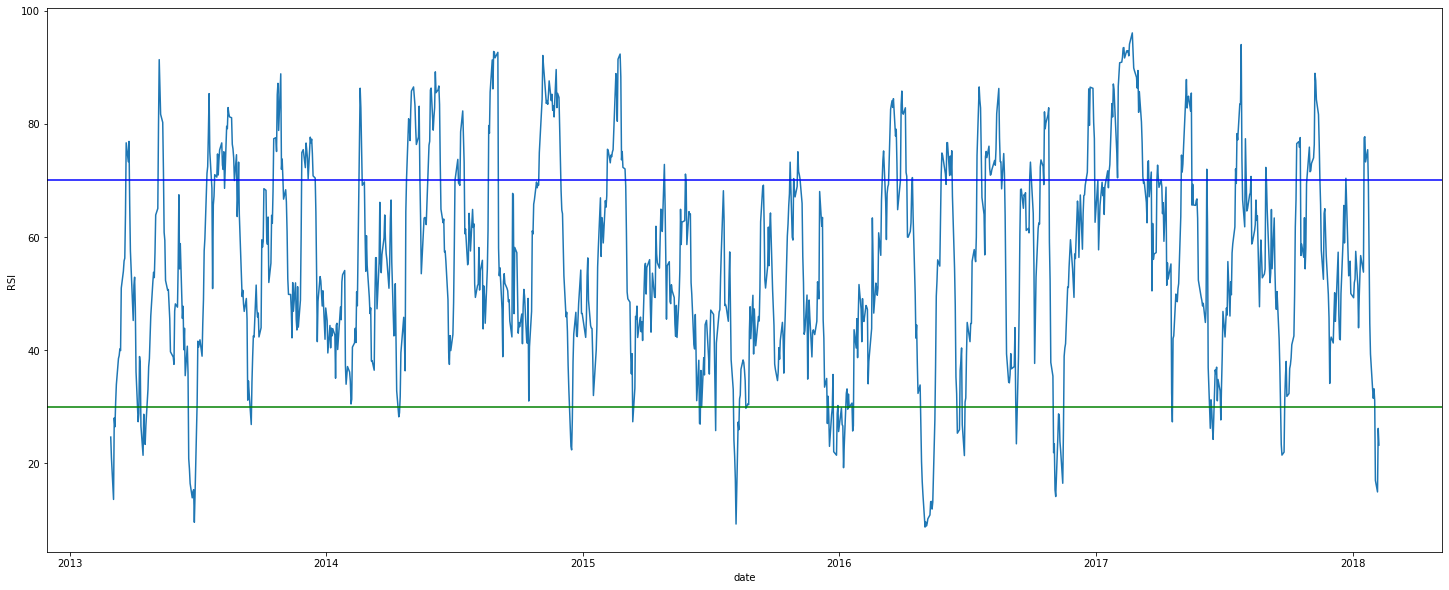

In [4]:
x = df['date']
y = df['RSI']
y1 = 70
y2 = 30


plt.figure(figsize=(25,10))
plt.plot(x, y)
plt.axhline(y = 70, color = 'b', linestyle = '-')
plt.axhline(y = 30, color = 'g', linestyle = '-')
plt.xlabel("date")
plt.ylabel("RSI")
plt.show()

In [5]:
df

,date,open,high,low,close,volume,Name,local_min,local_max,min_binary,max_binary,normalized_value,target,pct_change,gain,loss,14_avg_gain,14_avg_loss,RS,RSI
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,False,False,-0.016545,0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,68.5614,False,True,-0.021594,0,1.042235,1.042235,0.000000,NaN,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,False,False,-0.947358,0,-2.506658,0.000000,2.506658,NaN,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,False,False,-0.436600,0,-0.190297,0.000000,0.190297,NaN,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,False,False,-0.616743,0,-0.089934,0.000000,0.089934,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,NaN,167.7800,False,True,0.031031,0,0.209043,0.209043,0.000000,0.251036,0.557846,0.450009,31.034935
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,NaN,NaN,False,False,-0.559832,0,-4.339015,0.000000,4.339015,0.177276,0.867776,0.204288,16.963405
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,156.49,NaN,True,False,-0.461916,1,-2.498442,0.000000,2.498442,0.177276,1.009935,0.175533,14.932173
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,NaN,163.0300,False,True,8.089370,0,4.179181,4.179181,0.000000,0.357816,1.009935,0.354296,26.160912
